# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv("spotify.csv", index_col=0)

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [4]:
n_training = df_train.shape[0]
n_testing = df_test.shape[0]
print("There are", n_testing, "examples in testing")
print("There are", n_training, "examples in training")
df_train

There are 505 examples in testing
There are 1512 examples in training


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1396,0.286000,0.616,236960,0.387,0.000000,9,0.2770,-6.079,0,0.0335,81.856,4.0,0.4700,0,All in Vain,Mot
641,0.030200,0.756,256933,0.595,0.000002,1,0.1460,-6.924,1,0.0333,130.031,4.0,0.0681,1,One of Those Nights,Juicy J
1765,0.092500,0.685,257173,0.784,0.000000,9,0.3140,-4.971,1,0.1100,90.890,4.0,0.7340,0,Take Me As I Am,Wyclef Jean
1801,0.063700,0.406,224848,0.638,0.000000,9,0.1070,-6.085,0,0.1300,177.916,4.0,0.4040,0,Save My Soul,JoJo
1624,0.014400,0.507,213338,0.665,0.000000,0,0.0759,-7.598,1,0.0474,126.879,4.0,0.4060,0,Save the World - Radio Mix,Swedish House Mafia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.2110,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
1346,0.000021,0.535,203500,0.974,0.000149,10,0.2630,-3.566,0,0.1720,116.956,4.0,0.4310,0,Flag of the Beast,Emmure
1406,0.503000,0.410,256333,0.648,0.000000,7,0.2190,-4.469,1,0.0362,60.391,4.0,0.3420,0,Don't You Cry For Me,Cobi
1389,0.705000,0.894,222307,0.161,0.003300,4,0.3120,-14.311,1,0.0880,104.968,4.0,0.8180,0,장가갈 수 있을까 Can I Get Married?,Coffeeboy


#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [5]:
info_df = df_train.describe()
print(info_df)
new_df = df_train.drop(["song_title","artist"], axis = 1)
columns = new_df.columns
min = 100
name =" "
for col in columns:
    val = df_train[col].max()-df_train[col].min()
    if (val <= min):
        min = val;
        name = col;
print(name)

       acousticness  danceability    duration_ms       energy  \
count   1512.000000   1512.000000    1512.000000  1512.000000   
mean       0.185337      0.617565  247606.240741     0.682022   
std        0.257866      0.163086   81841.143743     0.211498   
min        0.000005      0.122000   16042.000000     0.014800   
25%        0.009460      0.512000  200072.000000     0.564000   
50%        0.063700      0.629500  230100.000000     0.713500   
75%        0.253000      0.738250  274041.750000     0.847250   
max        0.995000      0.984000  849960.000000     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean           0.139041     5.406746     0.189816    -7.089587     0.619048   
std            0.279536     3.635880     0.154115     3.841885     0.485782   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.00

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

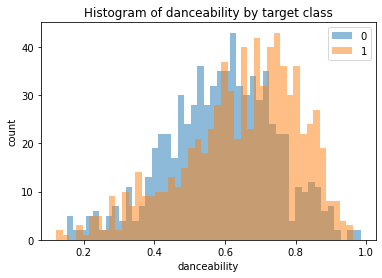

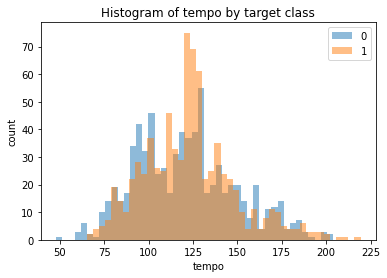

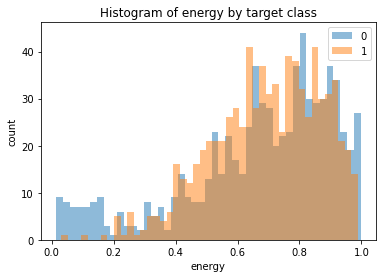

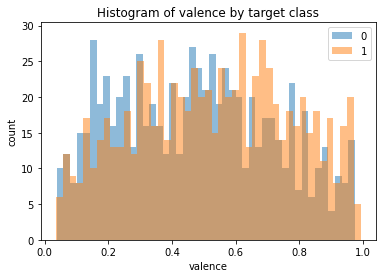

In [6]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")
list = ['danceability','tempo','energy','valence']
for str in list:
    graph = plt.hist(negative_examples[str], bins = 45, alpha = 0.5, label = "0")
    plt.title("Histogram of %s by target class" % str)
    plt.ylabel("count")
    plt.xlabel(str)
    graph2 = plt.hist(positive_examples[str], bins = 45, alpha = 0.5, label = "1")
    plt.legend()
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

**danceability: a reasonable split would be to predict 0 if danceability < 0.7 (and predict 1 otherwise)**

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



**The feature could still be useful in a combination with other features for predicting the target class, for example in a decision tree with more depth. However, The feature in terms of itself might not may be useful because the possibility to get right prediction can only be 50%**

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [7]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

**1. These features can be useful because there might be some keywords in the song title that are more catchy compare to others. Some artists might be more famous than others.**

**2. There will be difficulties because those values are string values, it would be hard to decide in what ways should those values produce significant meaning to a machine. For example, lets assume the keyword "love" is more catchy than others, then we need to sort out an way to separate "love" and filter it out in song titles.**

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [8]:
df_train.drop(["song_title", "artist"], axis = 1, inplace = True)
df_test.drop(["song_title", "artist"], axis = 1, inplace = True)

X_train = df_train.drop("target", axis = 1)
y_train = df_train["target"]

X_test = df_test.drop("target", axis = 1)
y_test = df_test["target"]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [9]:
ans = model.predict(X_train.iloc[[0]])
yrow = y_train.iloc[[0]]
print(ans, yrow)

[0] 1396    0
Name: target, dtype: int64


the predicted value is 0, and the value in y_train is also 0. Therefore they matched!

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [10]:
cv_score = cross_val_score(model, X_train, y_train, cv = 10)
cv_score_average = np.mean(cv_score)
cv_score_average
cv_score

array([0.67763158, 0.69078947, 0.67549669, 0.68874172, 0.61589404,
       0.70198675, 0.64900662, 0.66225166, 0.68211921, 0.71523179])

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [11]:
scores = cross_validate(
    model, X_train, y_train, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores)
score_mean = df_scores['test_score'].mean()
print(df_scores)
print(score_mean)

   fit_time  score_time  test_score  train_score
0  0.009926    0.000761    0.664474     0.999265
1  0.008490    0.000718    0.671053     1.000000
2  0.008371    0.000489    0.701987     1.000000
3  0.008766    0.000720    0.695364     0.999265
4  0.008349    0.000504    0.642384     0.999265
5  0.008047    0.000481    0.708609     0.999265
6  0.008318    0.000487    0.668874     0.999265
7  0.009204    0.000582    0.675497     0.999265
8  0.008282    0.000509    0.695364     0.999265
9  0.008398    0.000479    0.715232     0.999265
0.6838837574067619


**the cross-validation score is not exactly the same from the previous part, and it may due to randomness**

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

**There is a significant difference between training score and the test score.This shows that our model does better on the trained data than test data**

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

**The test scores for different folds are slightly different but similar. This means the performance of our model is little more or less the same throughout, so it is trustworthy.**

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

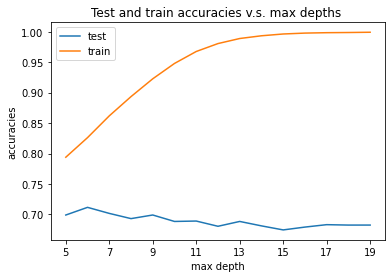

In [12]:
max_depths = np.arange(5, 20)
accuracies_test = []
accuracies_train = []
for md in max_depths:
    model = DecisionTreeClassifier(max_depth = md)
    scores = cross_validate(
    model, X_train, y_train, cv=10, return_train_score=True)
    info = pd.DataFrame(scores)
    accuracies_test.append(info[['test_score']].mean())
    accuracies_train.append(info[['train_score']].mean())

plt.plot(max_depths, accuracies_test, label = "test")
plt.plot(max_depths, accuracies_train, label = "train")
plt.ylabel("accuracies")
plt.xlabel("max depth")
plt.title("Test and train accuracies v.s. max depths ")
plt.xticks(np.arange(5, 20, 2))
plt.legend()
plt.show()

**Observation: The train_scores has a increasing trend through the first half of the graph, and remained steady for the rest. The test_scores has a slowly decreasing trend with some mild fluctuations along the way through the entire graph. Concludes: Higher the max depth is, higher the training score, and lower the test score, and this is due to overfitting.**

**test accuracy is the highest when max depth is 6, therefore, it should the be optimal depth.**

***I think it should generalize other Spotify datasets because our model is not overfitting by choosing max_depth = 6.***

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [13]:
model = DecisionTreeClassifier(max_depth = 6)
train_X = df_train.drop("target", axis=1)
train_y = df_train["target"]
test_X = df_test.drop("target", axis = 1)
test_y = df_test["target"]
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.699009900990099

**The score is slightly higher than the cross-validation score from the previous exercise. This may due to the optimal max depth resulting better score.**

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

**1. "true" -> y = -1 "false" -> y = +1**

**2. 5 ÷ 6 = 83%**

**3. no we can't because there is no single split can completely sort out "-1" and "+1" here**

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 